# Ford GoBike System Data Analysis
## by Abdallah Aboudeif

## Investigation Overview

> In general, Ford GoBike System Data Analysis aims to identify the most prominent user segments, their characteristics, and the extent to which their use relates to specific days during the week.

## Dataset Overview

> The given dataset represent data for bicycle trips that customers made during a period of the year 2019, trips data are the data related to trips date and time and its duration, and the customer's data, which are gender, year of birth, type of subscription, and also the bike number.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# dropping rows with null values
df.dropna(axis=0,inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The distribution of members type

> The percentage of customers for each type of subscription

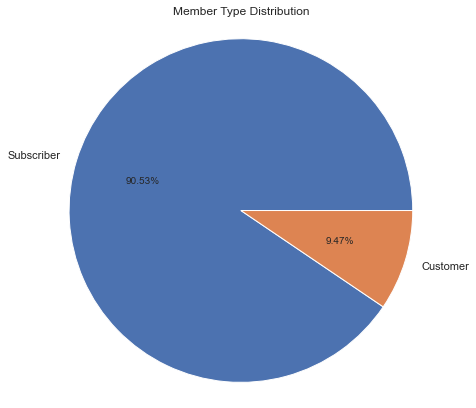

In [3]:
# visualizing user type distribution
user_type_counts = df.user_type.value_counts()
plt.figure(figsize = [14, 7])
plt.pie(user_type_counts, labels = user_type_counts.index, counterclock = True, autopct='%1.2f%%');
plt.axis('square')
plt.title('Member Type Distribution');

## The distribution of members age

> What ages customers are? and what is the number of customers in every age?

In [4]:
# changing the data type of start_time to datetime format
df.start_time = pd.to_datetime(df.start_time)

# dropping invalid data
df = df[df.member_birth_year.values > 1919]

# creating new column for member age
df['member_age'] = df.start_time.dt.year - df.member_birth_year

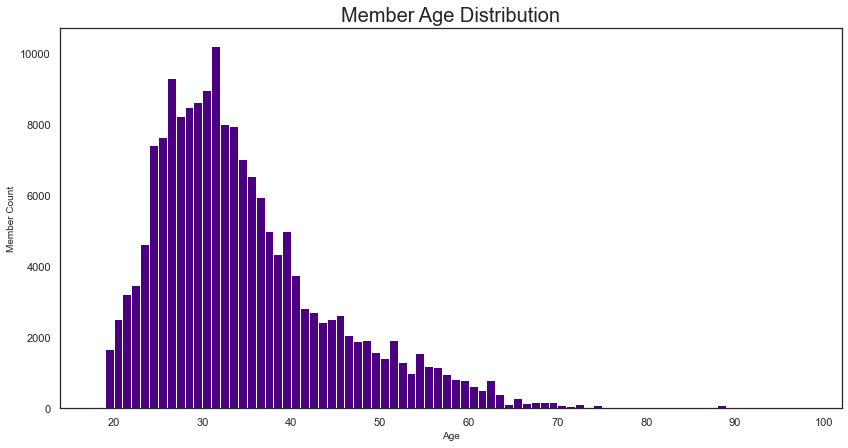

In [5]:
# visualizing member age
age_bins = np.arange(df['member_age'].min(), df['member_age'].max(), 1)
plt.figure(figsize = [14, 7])
plt.hist(data = df, x = 'member_age', bins = age_bins,color='indigo')
plt.title('Member Age Distribution', size = 20)
plt.xlabel('Age', size = 10)
plt.ylabel('Member Count', size = 10);

## The distribution of members gender

> What is the percentage of males and females customers?

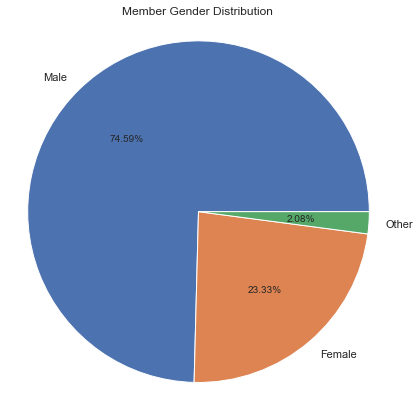

In [6]:
# visualizing user type distribution
member_gender_counts = df.member_gender.value_counts()
plt.figure(figsize = [14, 7])
plt.pie(member_gender_counts, labels = member_gender_counts.index, counterclock = True, autopct='%1.2f%%');
plt.axis('square')
plt.title('Member Gender Distribution');

## The distribution of trip durations

> Logarithmic scale for number of trips compared to trip durations

In [7]:
# converting trip duration to minutes
df = df.rename(columns = {"duration_sec":"duration_min"})
df.duration_min = df.duration_min / 60
df.duration_min = df.duration_min.astype(int)

# rename trip duration column
df = df.rename(columns = {"duration_sec":"duration_min"})

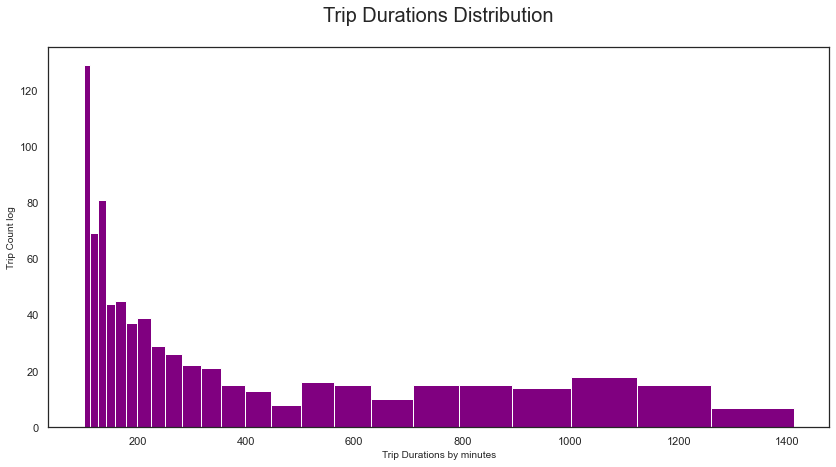

In [8]:
# visualizing trip durations using 'Logarithmic Scales' method
log_binsize = 0.05
duration_bins = 10 ** np.arange(2, np.log10(df.duration_min.max()) + log_binsize, log_binsize)
plt.figure(figsize = [14, 7])
plt.hist(data = df, x = 'duration_min', bins = duration_bins, color='purple')
plt.title('Trip Durations Distribution', y=1.05, size = 20)
plt.xlabel('Trip Durations by minutes', size = 10)
plt.ylabel('Trip Count log', size = 10);

## The distribution of trips number week days

> The number of trips for every day of the week

In [9]:
# extracting the trip start week day number and converting it to day name
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['start_day'] = df.start_time.dt.dayofweek
df['dayofweek'] = df['start_day'].apply(lambda x: weekday[x])
df_dayofweek = df.groupby(['dayofweek']).size().reset_index()


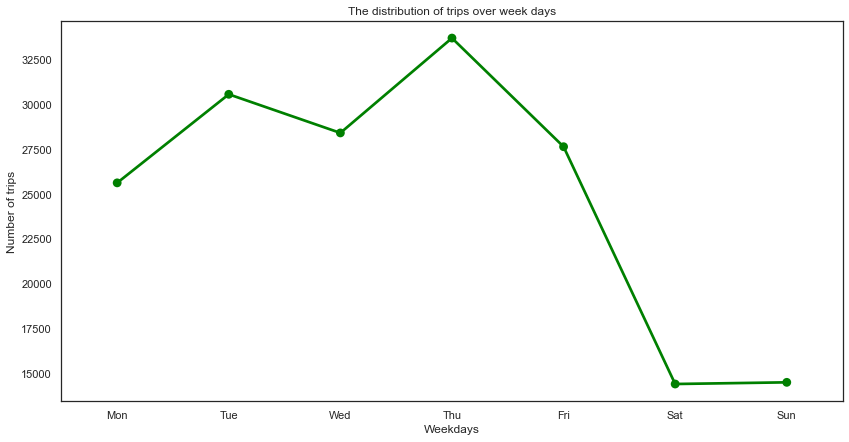

In [10]:
# visualizing the distribution of trips over week days
plt.figure(figsize = [14, 7])
sns.pointplot(data=df_dayofweek, x='dayofweek', y=0, color='green', order = weekday);
plt.title('The distribution of trips over week days')
plt.xlabel('Weekdays')
plt.ylabel('Number of trips');

## The distribution of trips changes over the week days according to user type

> Trip durations spent by every user type for every day of the week

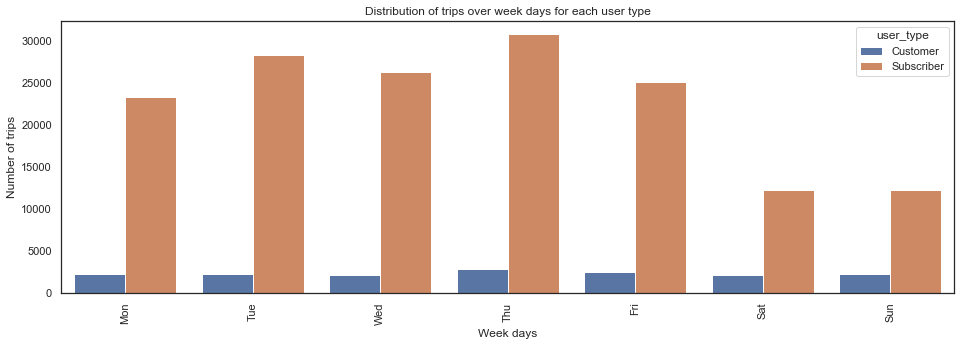

In [11]:
# visualizing the distribution of trips changing over the week days according to user type
plt.figure(figsize=[ 16,5])
sns.countplot(data = df , x = 'dayofweek',hue = 'user_type',order = weekday);
plt.title('Distribution of trips over week days for each user type')
plt.xlabel('Week days')
plt.ylabel('Number of trips')
plt.xticks(rotation = 90);

## The relationship between the percentages of male and female users for each day of the week

> The number of trips for males and females customers on every day of the week

In [12]:
# calculating the rate of trips frequency for male and female users
males_trips = df[df['member_gender'] == 'Male'].dayofweek
females_trips = df[df['member_gender'] == 'Female'].dayofweek
males_proportion = males_trips.value_counts() / len(males_trips)
females_proportion = females_trips.value_counts() / len(females_trips)

# creating trips frequency rate dataframe
mixed = pd.DataFrame([males_proportion,females_proportion]).T.reindex(weekday)
mixed.columns = ['Males','Females']

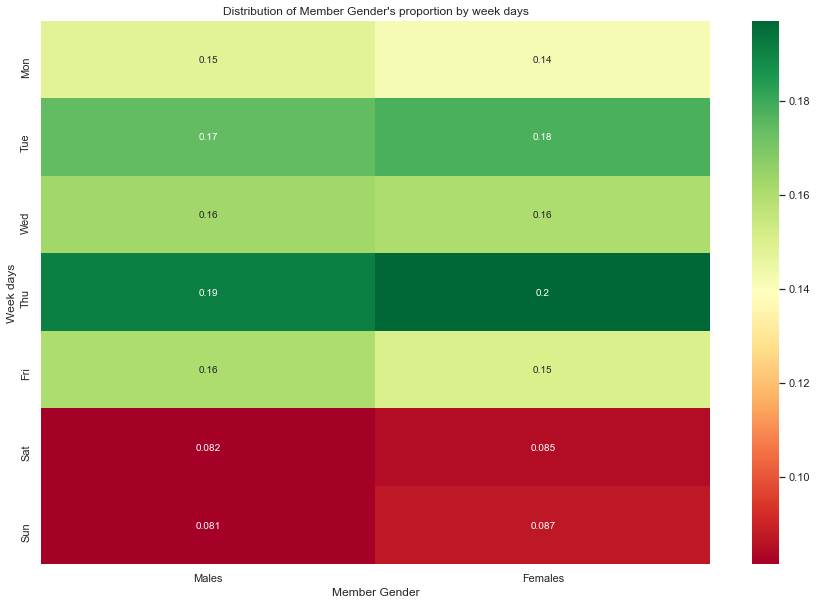

In [13]:
# visualizing the distribution of member gender's proportion by week days
plt.figure(figsize=[ 15, 10])
sns.heatmap(mixed,annot = True,cmap='RdYlGn')
plt.title("Distribution of Member Gender's proportion by week days")
plt.xlabel('Member Gender')
plt.ylabel('Week days');

## The distribution of trips duration spent by every member age over week days

> Trips duration for every customer age on every day of the week

In [14]:
# creating a dataset for trips duration for every member age over week days
df_ageweek = pd.DataFrame(df.groupby(['dayofweek','member_age'])['duration_min'].sum()).reset_index()


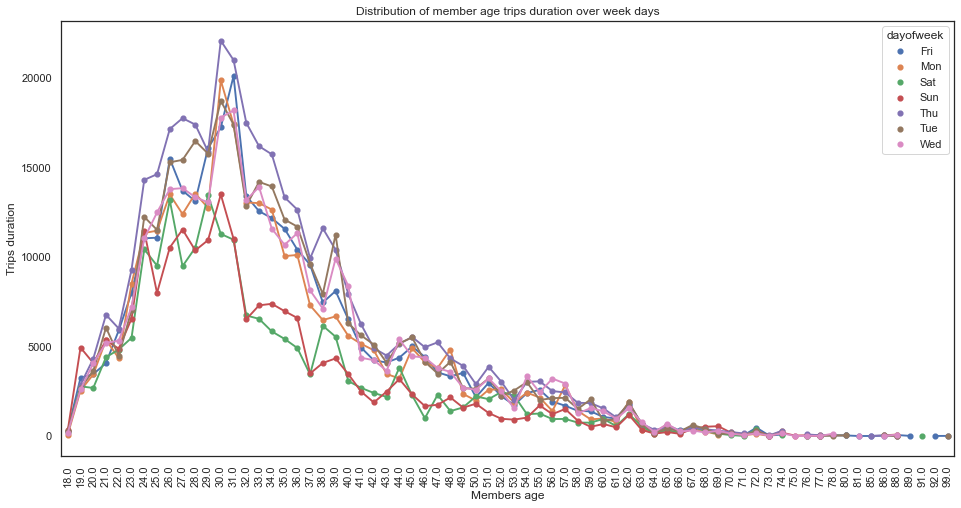

In [15]:
# visualizing the distribution of member age trips duration over week days
plt.figure(figsize=[ 16, 8])
sns.pointplot(data=df_ageweek, x='member_age', y='duration_min', hue = 'dayofweek', scale=.7);
plt.title('Distribution of member age trips duration over week days')
plt.xlabel('Members age')
plt.ylabel('Trips duration')
plt.xticks(rotation = 90);

## The distribution of trips duration spent by every member gender over week days

> Trips duration spent by every member gender over week days

In [16]:
# creating a dataset for trips duration for every member gender over week days
df_genderweek = pd.DataFrame(df.groupby(['dayofweek','member_gender'])['duration_min'].sum()).reset_index()

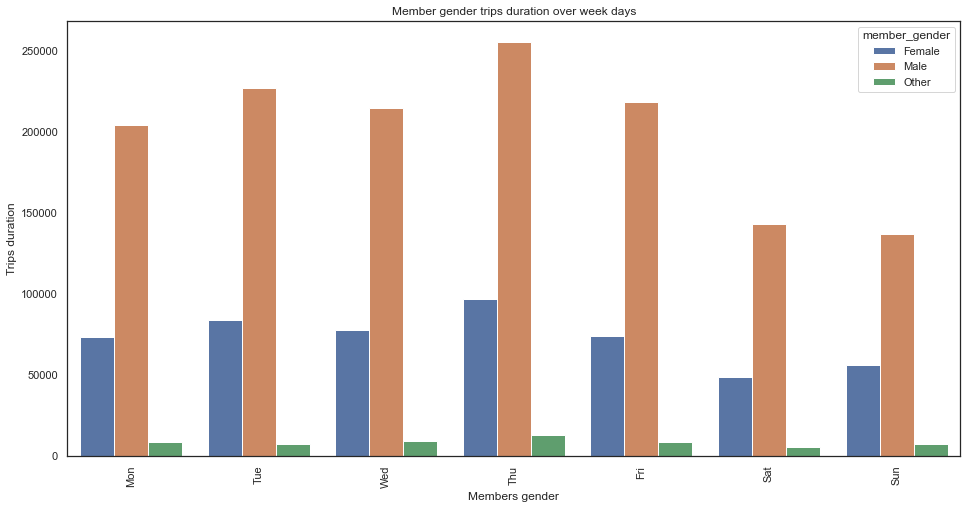

In [17]:
# visualizing the distribution of member gender trips duration over week days
plt.figure(figsize=[ 16, 8])
sns.barplot(data=df_genderweek, x='dayofweek', y='duration_min', hue = 'member_gender',order=weekday);
plt.title('Member gender trips duration over week days')
plt.xlabel('Members gender')
plt.ylabel('Trips duration')
plt.xticks(rotation = 90);

## The distribution of trips duration compared to trips numbers over week days

> Trips duration compared to number of trips over week days

In [18]:
# creating a dataset for trip durations mean and another for trip numbers mean for every day of week
duration = df.groupby(['dayofweek'])['duration_min'].sum().reset_index()
count = df.groupby(['dayofweek']).size().reset_index()

# merging duration and count dataframes in one dataframe
df_mixed = pd.merge(duration, count, on="dayofweek")
df_mixed.columns = ['dayofweek','duration','count']
df_mixed['duration'] = df_mixed['duration'] / df_mixed['duration'].sum()
df_mixed['count'] = df_mixed['count'] / df_mixed['count'].sum()
df_mixed.index = df_mixed['dayofweek']
df_mixed.drop(columns=['dayofweek'],inplace = True)

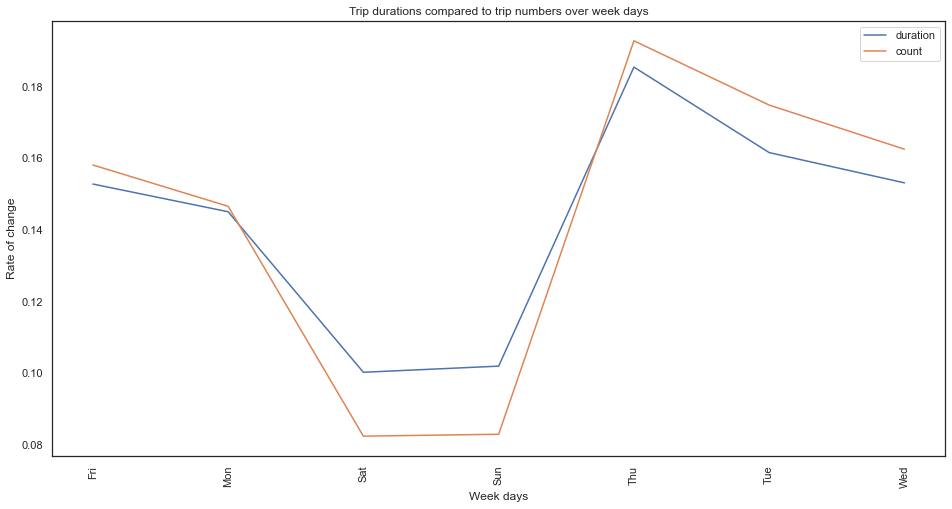

In [19]:
# visualizing the distribution of trips duration compared to trips numbers over week days
df_mixed.plot(kind='line',figsize=[ 16, 8])
plt.title('Trip durations compared to trip numbers over week days')
plt.xlabel('Week days')
plt.ylabel('Rate of change')
plt.xticks(rotation = 90);

## Summary
> The largest segment of customers in terms of gender is the male customers by 75%. As for the type of user, the largest percentage of customers is the subscribers by 90%, and for the common age group it is the youth between 20 and 42 years old.

> Although Thursdays and Tuesdays are the days with the largest total trip durations, trips on Saturdays and Sundays have a higher rate of duration than the rest of week days compared to the number of trips, while the duration rate decreases on the rest of week days compared to the average number of trips. 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!